In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orgin_df = pd.read_csv('./SampleInputFiles/sampleOriginationCombined.csv', low_memory=False)

In [3]:
perf_summary = pd.read_csv('./SampleInputFiles/SamplePerformanceCombinedSummary.csv', low_memory = False)

In [4]:
## Add dummy variable to indicate actual loss
def generateDummy(a):
    if a == 0:
        return 0
    else:
        return 1

In [5]:
perf_summary['actual_loss_flag'] = perf_summary.apply(lambda x: generateDummy(x.max_actual_loss),axis =1)

In [6]:
perf_summary['actual_loss_flag'].value_counts()

0    1106377
1       2761
Name: actual_loss_flag, dtype: int64

In [7]:
df_to_join = perf_summary[['id_loan','actual_loss_flag']]

In [8]:
## Join the dummy variable to the origination data

joined_df = pd.DataFrame()
joined_df = pd.merge(orgin_df, df_to_join, on='id_loan', how='inner')
joined_df

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,seller_name,servicer_name,flag_sc,id_preharp,indicator,harp_indicator,property_method,interest_only,Year,actual_loss_flag
0,618,200210,N,202902,10420,25,1,P,85,24,...,Other sellers,Other servicers,N,NaN,9,N,9,N,1999,0
1,619,200303,N,201802,0,0,1,P,74,25,...,Other sellers,Other servicers,N,NaN,9,N,9,N,1999,0
2,515,200303,N,202903,12700,0,1,S,78,32,...,Other sellers,Other servicers,N,NaN,9,N,9,N,1999,0
3,649,199904,Y,202903,17820,999,1,P,95,46,...,Other sellers,GMAC MORTGAGE CORPORATION,N,NaN,9,N,9,N,1999,0
4,768,199905,N,202904,12980,0,1,P,75,21,...,Other sellers,Other servicers,N,NaN,9,N,9,N,1999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109133,654,202105,N,205104,47894,0,1,P,79,40,...,Other sellers,Other servicers,N,NaN,9,N,2,N,2021,0
1109134,802,202106,N,205105,47894,0,1,I,50,40,...,Other sellers,Other servicers,N,NaN,9,N,2,N,2021,0
1109135,785,202105,N,205104,41980,0,1,I,68,26,...,Other sellers,Other servicers,N,NaN,9,N,2,N,2021,0
1109136,801,202104,N,204503,15540,0,1,I,50,42,...,Other sellers,Other servicers,N,NaN,9,N,2,N,2021,0


In [9]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1109138 entries, 0 to 1109137
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   fico              1109138 non-null  int64  
 1   dt_first_pi       1109138 non-null  int64  
 2   flag_fthb         1109138 non-null  object 
 3   dt_matr           1109138 non-null  int64  
 4   cd_msa            1109138 non-null  int64  
 5   mi_pct            1109138 non-null  int64  
 6   cnt_units         1109138 non-null  int64  
 7   occpy_sts         1109138 non-null  object 
 8   cltv              1109138 non-null  int64  
 9   dti               1109138 non-null  int64  
 10  orig_upb          1109138 non-null  int64  
 11  ltv               1109138 non-null  int64  
 12  int_rt            1109138 non-null  float64
 13  channel           1109138 non-null  object 
 14  ppmt_pnlty        1109138 non-null  object 
 15  prod_type         1109138 non-null  object 
 16  

In [10]:
from sklearn import preprocessing
unused_columns = ['id_loan']
lbl_dict = {}
for c in joined_df.columns:
    print(c)
    if c == "flag_fthb": 
        joined_df[c] =joined_df[c].map({'N':0,'Y':1, '9': np.nan})
        #df[c] = df[c].astype('int64')
    elif c == "mi_pct": 
        joined_df.loc[joined_df[c] == '999', c] = np.nan
    elif c == "cnt_units": 
        joined_df.loc[joined_df[c] == '99', c] = np.nan
    
    elif c == "cd_msa": 
        joined_df[c] =joined_df[c].fillna(0)
    elif c == "zipcode": 
        joined_df[c] =joined_df[c].fillna(0)
    elif c == "ppmt_pnlty": 
        joined_df[c] =joined_df[c].map({'N':0,'Y':1})
    
    if (joined_df[c].dtype=='object' or c == "zipcode" or c =="cd_msa")and c not in unused_columns: 
        print('L')
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(joined_df[c].values))
        lbl_dict[c] = lbl
        joined_df[c] = lbl.transform(list(joined_df[c].values))

fico
dt_first_pi
flag_fthb
dt_matr
cd_msa
L
mi_pct
cnt_units
occpy_sts
L
cltv
dti
orig_upb
ltv
int_rt
channel
L
ppmt_pnlty
prod_type
L
st
L
prop_type
L
zipcode
L
id_loan
loan_purpose
L
orig_loan_term
cnt_borr
seller_name
L
servicer_name
L
flag_sc
L
id_preharp
L
indicator
L
harp_indicator
L
property_method
interest_only
L
Year
actual_loss_flag


## Split Data

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def split_n_transform(df, features):
    X_pre = df[features]
    y = df['actual_loss_flag']
    num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),
        #('attribs_adder', FunctionTransformer(add_extra_features, validate=False)),
        ('std_scaler', StandardScaler()),
    ])
    X = num_pipeline.fit_transform(X_pre)
    return X, y

In [12]:
features = joined_df.columns.drop(['actual_loss_flag','Year','id_loan','id_preharp'])
future_df = joined_df[joined_df['Year']>=2018]
old_df = joined_df[joined_df['Year']<2018]

old_X,old_y = split_n_transform(old_df,features)
future_X,future_y = split_n_transform(future_df,features)

## Undersample and oversample

In [13]:
## Dealing with imblance: Oversample and undersample

def subsample_data(df):
    shuffle = df.sample(frac=1,random_state=4)
    shuffle_bad = shuffle.loc[shuffle['actual_loss_flag'] == 1]
    shuffle_good_subsample = shuffle.loc[shuffle['actual_loss_flag'] == 0].sample(n=len(shuffle_bad),random_state=42)
    combined = pd.concat([shuffle_good_subsample, shuffle_bad])
    return combined.sample(frac=1,random_state=4)

In [28]:
old_under_sample = subsample_data(old_df)
old_X_under, old_y_under = split_n_transform(old_under_sample, features)
future_under_sample = subsample_data(future_df)
future_X_under, future_y_under = split_n_transform(future_under_sample, features)

In [29]:
future_under_sample

,fico,dt_first_pi,flag_fthb,dt_matr,cd_msa,mi_pct,cnt_units,occpy_sts,cltv,dti,...,seller_name,servicer_name,flag_sc,id_preharp,indicator,harp_indicator,property_method,interest_only,Year,actual_loss_flag
978567,692,201809,1.0,204808,75,25.0,1.0,1,87,42,...,47,46,0,82936,0,0,2,0,2018,1
957946,744,201805,0.0,204804,184,0.0,1.0,1,76,47,...,99,77,0,82936,0,0,2,0,2018,1
1004684,754,201905,0.0,204904,0,0.0,1.0,1,77,41,...,63,46,0,82936,0,0,2,0,2019,0
1045918,716,202002,0.0,205001,366,0.0,1.0,1,70,20,...,33,50,0,82936,0,0,1,0,2019,0
1012189,698,201907,0.0,204906,391,25.0,1.0,1,90,41,...,91,73,0,82936,0,0,2,0,2019,0
979308,666,201811,1.0,204810,23,25.0,1.0,1,97,27,...,74,57,0,82936,1,0,2,0,2018,1
949055,709,201803,0.0,204802,258,25.0,1.0,1,97,30,...,59,43,0,82936,1,0,2,0,2018,1
1098266,770,202103,0.0,205102,261,30.0,1.0,1,95,42,...,60,44,0,82936,0,0,2,0,2021,0


In [26]:
old_df = old_df.dropna()

In [32]:
from imblearn.over_sampling import SMOTE

def over_sample(df):
# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
    sm = SMOTE(sampling_strategy='minority', random_state=7,k_neighbors=3)
    #print(df[features].head(),df['Bad_Loans'].head())
# Fit the model to generate the data.
    over_X, over_y= sm.fit_sample(df[features], df['actual_loss_flag'])
    #print('abc')
    oversampled = pd.concat([pd.DataFrame(over_X), pd.DataFrame(over_y)], axis=1)
    #print('ok')
    return oversampled.sample(frac=1,random_state=4)

In [52]:
old_over_sample = over_sample(old_df)
old_X_over, old_y_over = split_n_transform(old_over_sample, features)
future_over_sample = over_sample(future_df)
future_X_over, future_y_over = split_n_transform(future_over_sample, features)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


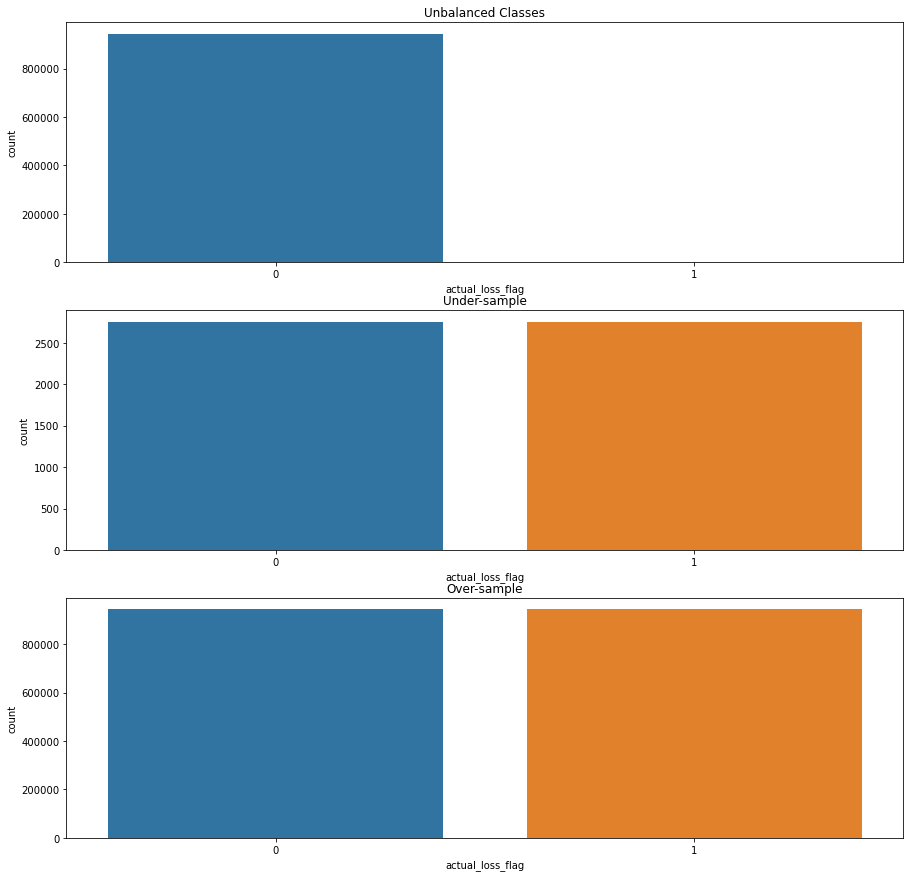

In [43]:
#plot the dataset after the undersampling
plt.figure(figsize=(15, 15))
plt.subplot(311)
sns.countplot('actual_loss_flag',data=old_df)
plt.title('Unbalanced Classes')
plt.subplot(312)
sns.countplot('actual_loss_flag', data=old_under_sample)
plt.title('Under-sample')
plt.subplot(313)
sns.countplot('actual_loss_flag', data=old_over_sample)
plt.title('Over-sample')
plt.show()
## save_fig('balance_count')

In [44]:
def plot_roc_curve(fpr, tpr,thres, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [45]:
from sklearn.metrics import *
def prediction_summary_balanced(clf_name,session_name,y, pred):
    print(clf_name,'\n',session_name,'\n Accuracy:',accuracy_score(y, pred),
         'ROC AUC:',roc_auc_score(y, pred), '\n','F1 Score:',f1_score(y, pred),'Matthews CC:',matthews_corrcoef(y,pred),'\n',
         'Precision Recall fscore support',precision_recall_fscore_support(y,pred),'\n',confusion_matrix(y, pred))

In [46]:
from sklearn.metrics import *
def prediction_summary_imbalanced(clf_name,session_name,y, pred):
    print(clf_name,'\n',session_name,'\n Balanced Accuracy Score:',balanced_accuracy_score(y, pred),
         'ROC AUC:',roc_auc_score(y, pred), '\n','F1 Score:',f1_score(y, pred),'Matthews CC:',matthews_corrcoef(y,pred),'\n',
         'Precision Recall fscore support',precision_recall_fscore_support(y,pred))#,'\n Average Precision score:', average_precision_score(y,pred))
    print(confusion_matrix(y, pred))

In [47]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import time

def classification_balanced(train_X, train_y, test_X,test_y):
    gbrt_clf = GradientBoostingClassifier(n_estimators=10, random_state=42)
    sgd_clf = SGDClassifier(random_state = 42)
    rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
    ada_clf = AdaBoostClassifier(random_state = 42)
    
    voting_clf = VotingClassifier(
    estimators=[('sgd', sgd_clf), ('rf', rnd_clf),('gb',gbrt_clf),('ada',ada_clf)],
    voting='hard')
    voting_clf.fit(train_X, train_y)
    
    y_pred_train_all = pd.DataFrame(data = pd.Series(train_y))
    y_pred_test_all= pd.DataFrame(data = pd.Series(test_y))

    

    for clf in (sgd_clf,rnd_clf,gbrt_clf,ada_clf, voting_clf):
        start_time = time.time()
        clf.fit(train_X, train_y)
        y_pred_train = clf.predict(train_X)
        y_pred_test = clf.predict(test_X)
       
        y_pred_train_all[clf.__class__.__name__] = pd.Series(y_pred_train).values
        y_pred_test_all[clf.__class__.__name__] = pd.Series(y_pred_test).values
                   
        prediction_summary_balanced(clf.__class__.__name__,'Training', train_y,y_pred_train)
        prediction_summary_balanced(clf.__class__.__name__,'Testing',test_y, y_pred_test)    
        print("--- %s seconds ---" % (time.time() - start_time))

In [48]:
classification_balanced(old_X_under, old_y_under, future_X_under, future_y_under)

SGDClassifier 
 Training 
 Accuracy: 0.6950998185117967 ROC AUC: 0.6950998185117967 
 F1 Score: 0.6925329428989749 Matthews CC: 0.39025403968432243 
 Precision Recall fscore support (array([0.69189575, 0.6984127 ]), array([0.70344828, 0.68675136]), array([0.69762419, 0.69253294]), array([2755, 2755], dtype=int64)) 
 [[1938  817]
 [ 863 1892]]
SGDClassifier 
 Testing 
 Accuracy: 0.75 ROC AUC: 0.75 
 F1 Score: 0.75 Matthews CC: 0.5 
 Precision Recall fscore support (array([0.75, 0.75]), array([0.75, 0.75]), array([0.75, 0.75]), array([4, 4], dtype=int64)) 
 [[3 1]
 [1 3]]
--- 0.41345930099487305 seconds ---
RandomForestClassifier 
 Training 
 Accuracy: 0.9925589836660617 ROC AUC: 0.9925589836660618 
 F1 Score: 0.9925359548516294 Matthews CC: 0.9851367226868838 
 Precision Recall fscore support (array([0.98953824, 0.99561724]), array([0.99564428, 0.98947368]), array([0.99258187, 0.99253595]), array([2755, 2755], dtype=int64)) 
 [[2743   12]
 [  29 2726]]
RandomForestClassifier 
 Testing 


In [53]:
classification_balanced(old_X_over, old_y_over, future_X_over, future_y_over)

SGDClassifier 
 Training 
 Accuracy: 0.8190672741210236 ROC AUC: 0.8190672741210236 
 F1 Score: 0.8253477810329166 Matthews CC: 0.6397913564401888 
 Precision Recall fscore support (array([0.84379291, 0.79765955]), array([0.7831072 , 0.85502735]), array([0.81231822, 0.82534778]), array([943171, 943171], dtype=int64)) 
 [[738604 204567]
 [136734 806437]]
SGDClassifier 
 Testing 
 Accuracy: 0.8683036401120034 ROC AUC: 0.8683036401120034 
 F1 Score: 0.8773097584607534 Matthews CC: 0.7446761361403296 
 Precision Recall fscore support (array([0.93167868, 0.8211547 ]), array([0.7948983 , 0.94170898]), array([0.85787058, 0.87730976]), array([162495, 162495], dtype=int64)) 
 [[129167  33328]
 [  9472 153023]]
--- 10.165824890136719 seconds ---
RandomForestClassifier 
 Training 
 Accuracy: 0.9998711792453331 ROC AUC: 0.9998711792453331 
 F1 Score: 0.9998711652440943 Matthews CC: 0.9997423821055034 
 Precision Recall fscore support (array([0.99976255, 0.99997985]), array([0.99997986, 0.9997625 ]

## Analysis


Under sampling: too few data points for test set(only 8). Accuracy can be affected by chance

-> Choose oversample for further study: sufficient cases for each type and reliable accurancy and ROC score

### Compare each model:

#### In only accuracy merit:
Best: Random forest
Highest accuracy for both training and test set

#### In ROC/AUC score merit:

Best: Random forest

#### least false negative

It's much more hamful to make false negative than false positive, because we mislabeled a risky loan that will cause actual loss as a safe loan.

Best: AdaBoost Classifier


## Next Step

Try XGBoost and Neural Network

We are looking for:
higher accuracy when making least false negative mistake.

Adding validation set for these two models:
for hyperparameter tuning and dealing with overfitting